In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

data= pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


En este dataset hay 10000 registros que muestran el indice de desempeño de los estudiantes y otras variables predictoras:

*Horas de estudio:* Número de horas estudiadas por cada estudiante

*Puntuaciones anteriores:* Puntuación obtenida en anteriores tests

*Actividades extracurriculares:* El estudiante participa en actividades extracurriculares (SI/NO)

*Horas de sueño:* Promedio de horas que ha dormido el estudiante por día

*Ejemplos de cuestionarios:* Número de ejemplos de cuestionarios que el estudiante ha practicado 

*Performance index:* Indice de 10 a 100 que indica el desempeño del estudiante

Recuperado de: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [3]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [4]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
duplicados = data[data.duplicated(keep=False)]
print(duplicados)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
202               9               52                         No            5   
212               5               41                         No            8   
415               2               81                         No            6   
426               9               86                        Yes            6   
507               4               70                        Yes            6   
...             ...              ...                        ...          ...   
9644              4               91                        Yes            4   
9940              8               95                         No            5   
9954              6               97                         No            8   
9966              1               41                         No            7   
9985              8               99                         No            5   

      Sample Question Papers Practiced 

In [8]:
df=data.drop_duplicates()

In [9]:
df.shape

(9873, 6)

In [10]:
df.duplicated().sum()

0

In [11]:
#variable dependiente e independientes
y=df['Performance Index']
X=df['Previous Scores']

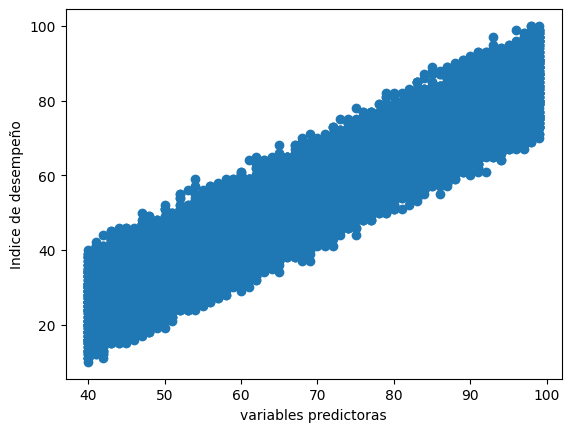

In [12]:
plt.scatter(df['Previous Scores'],y)
plt.ylabel('Indice de desempeño')
plt.xlabel('variables predictoras')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

División 70% 30%

In [15]:
X_train

4066    84
7268    82
3715    83
5619    60
9311    94
        ..
5771    46
5221    60
5424    95
860     47
7337    84
Name: Previous Scores, Length: 6911, dtype: int64

In [16]:
y_train

4066    75.0
7268    72.0
3715    81.0
5619    48.0
9311    76.0
        ... 
5771    22.0
5221    56.0
5424    81.0
860     20.0
7337    82.0
Name: Performance Index, Length: 6911, dtype: float64

In [17]:
X_test

6099    64
106     90
9265    73
4707    43
2155    76
        ..
4442    97
9458    59
5878    42
2638    78
7665    87
Name: Previous Scores, Length: 2962, dtype: int64

In [18]:
y_test

6099    47.0
106     76.0
9265    62.0
4707    23.0
2155    76.0
        ... 
4442    78.0
9458    47.0
5878    30.0
2638    52.0
7665    60.0
Name: Performance Index, Length: 2962, dtype: float64

In [19]:
#Xtrain Ytrain
x=sm.add_constant(X_train)
regresion= sm.OLS(y_train, x).fit()


In [20]:
regresion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 3.598e+04
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:06:32   Log-Likelihood:                -23935.
No. Observations:                6911   AIC:                         4.787e+04
Df Residuals:                    6909   BIC:                         4.789e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -15.4213      0.383    -40.250      0.000     -16.172     -14.670
Previous Scores     1.0166      0.005    189.679      0.000       1.006       1.027
==============================================================================
Omnibus:                     1594.484   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.579
Skew:                           0.009   Prob(JB):                     1.31e-63
Kurtosis:                       1.997   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x

,const,Previous Scores
4066,1.0,84
7268,1.0,82
3715,1.0,83
5619,1.0,60
9311,1.0,94
...,...,...
5771,1.0,46
5221,1.0,60
5424,1.0,95
860,1.0,47


In [29]:
constante= sm.add_constant(X_test)
constante

,const,Previous Scores
6099,1.0,64
106,1.0,90
9265,1.0,73
4707,1.0,43
2155,1.0,76
...,...,...
4442,1.0,97
9458,1.0,59
5878,1.0,42
2638,1.0,78


In [32]:
prediccion= regresion.predict(constante)
prediccion

6099    49.639921
106     76.071033
9265    58.789152
4707    28.291715
2155    61.838896
          ...    
4442    83.187102
9458    44.557015
5878    27.275134
2638    63.872058
7665    73.021289
Length: 2962, dtype: float64

In [34]:
tabla=pd.DataFrame({'Prediccion':prediccion})
union=constante.join(tabla)

In [35]:
union

,const,Previous Scores,Prediccion
6099,1.0,64,49.639921
106,1.0,90,76.071033
9265,1.0,73,58.789152
4707,1.0,43,28.291715
2155,1.0,76,61.838896
...,...,...,...
4442,1.0,97,83.187102
9458,1.0,59,44.557015
5878,1.0,42,27.275134
2638,1.0,78,63.872058
